In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install openpyxl
%pip install aif360

: 

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

: 

## Intro

In [7]:
PATH = 'C:/Users/aberti/Desktop/ProjectWork_AEQUITAS_AKKODIS/data/'
df = (
    pd.read_excel(PATH + 'Dataset_2.0_Akkodis.xlsx')
      .rename(columns=lambda c: c.lstrip().title())
)
df.head()

,Id,Candidate State,Age Range,Residence,Sex,Protected Category,Tag,Study Area,Study Title,Years Experience,...,Akkodis Headquarters,Current Ral,Expected Ral,Technical Skills,Standing/Position,Comunication,Maturity,Dynamism,Mobility,English
0,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,2.0,2.0,1.0,2.0,2.0,3.0,3.0
4,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning

In [8]:
df = df.drop_duplicates(subset='Id', keep='last')
df.head()

,Id,Candidate State,Age Range,Residence,Sex,Protected Category,Tag,Study Area,Study Title,Years Experience,...,Akkodis Headquarters,Current Ral,Expected Ral,Technical Skills,Standing/Position,Comunication,Maturity,Dynamism,Mobility,English
5,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,3.0,2.0,2.0,3.0,3.0,2.0,4.0
11,21020,Vivier,40 - 45 years,CONVERSANO » Bari ~ Puglia,Female,NaN,"-, C, C++, DO178, LABVIEW, SOFTWARE DEVELOPMENT",computer engineering,Five-year degree,[7-10],...,NaN,24-26 K,26-28 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,27054,QM,36 - 40 years,CASERTA » Caserta ~ Campania,Male,NaN,PROCESS ENG.,chemical engineering,Five-year degree,[3-5],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,27966,QM,> 45 years,SESTO SAN GIOVANNI » Milan ~ Lombardy,Male,NaN,"CISCO, NOC DAS SUPPORT, SOC",Legal,Five-year degree,[7-10],...,NaN,20-22 K,20-22 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,48399,In selection,31 - 35 years,MAZARA DEL VALLO » Trapani ~ Sicily,Male,NaN,"CALIBRATION, CAN, DYANALIZER, GT POWER, HIL, M...",Mechanical engineering,Five-year degree,[3-5],...,NaN,NaN,24-26 K,3.0,2.0,2.0,2.0,3.0,1.0,1.0


In [9]:
columns_to_drop = ['Id', 'Last Role', 'Year Of Insertion',
                   'Assumption Headquarters', 'Linked_Search__Key',
                   'Akkodis Headquarters']
THRESHOLD = 0.4

for col in df.columns:
  null_count = df[col].isna().sum() / df.shape[0]
  if null_count > THRESHOLD:
    columns_to_drop.append(col)
    print(f'DROPPED <Column: {col}> NULL count: {null_count*100:.2f}%')
  else:
    print(f'<Column: {col}> NULL count: {null_count*100:.2f}%')
  
df = df.drop(columns=columns_to_drop)
df.head()

<Column: Id> NULL count: 0.00%
<Column: Candidate State> NULL count: 0.00%
<Column: Age Range> NULL count: 0.00%
<Column: Residence> NULL count: 0.01%
<Column: Sex> NULL count: 0.00%
DROPPED <Column: Protected Category> NULL count: 99.64%
DROPPED <Column: Tag> NULL count: 74.69%
<Column: Study Area> NULL count: 0.32%
<Column: Study Title> NULL count: 0.00%
<Column: Years Experience> NULL count: 0.00%
DROPPED <Column: Sector> NULL count: 59.45%
DROPPED <Column: Last Role> NULL count: 59.50%
<Column: Year Of Insertion> NULL count: 0.00%
DROPPED <Column: Year Of Recruitment> NULL count: 96.35%
DROPPED <Column: Recruitment Request> NULL count: 96.88%
DROPPED <Column: Assumption Headquarters> NULL count: 96.37%
DROPPED <Column: Job Family Hiring> NULL count: 96.37%
DROPPED <Column: Job Title Hiring> NULL count: 96.37%
<Column: Event_Type__Val> NULL count: 12.29%
DROPPED <Column: Event_Feedback> NULL count: 85.66%
DROPPED <Column: Linked_Search__Key> NULL count: 84.64%
DROPPED <Column: Overa

,Candidate State,Age Range,Residence,Sex,Study Area,Study Title,Years Experience,Event_Type__Val
5,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,Automation/Mechatronics Engineering,Five-year degree,[1-3],BM interview
11,Vivier,40 - 45 years,CONVERSANO » Bari ~ Puglia,Female,computer engineering,Five-year degree,[7-10],Candidate notification
13,QM,36 - 40 years,CASERTA » Caserta ~ Campania,Male,chemical engineering,Five-year degree,[3-5],Qualification Meeting
17,QM,> 45 years,SESTO SAN GIOVANNI » Milan ~ Lombardy,Male,Legal,Five-year degree,[7-10],Qualification Meeting
25,In selection,31 - 35 years,MAZARA DEL VALLO » Trapani ~ Sicily,Male,Mechanical engineering,Five-year degree,[3-5],BM interview


In [10]:
print(f'Columns that contain NaN values:\n {df.columns[df.isnull().any()].tolist()}')

for col in df.columns[df.isnull().any()].tolist():
  print(f'{col} values: {df[col].unique()} \n') # Analyze each NaN containing feature first to determine the default fill value

Columns that contain NaN values:
 ['Residence', 'Study Area', 'Event_Type__Val']
Residence values: ['TURIN » Turin ~ Piedmont' 'CONVERSANO » Bari ~ Puglia'
 'CASERTA » Caserta ~ Campania' ...
 'SAN FELICE A CANCELLO » Caserta ~ Campania'
 'PERDIFUMO » Salerno ~ Campania'
 'PALMANOVA » Udine ~ Friuli Venezia Giulia'] 

Study Area values: ['Automation/Mechatronics Engineering' 'computer engineering'
 'chemical engineering' 'Legal' 'Mechanical engineering'
 'Telecommunications Engineering' 'Economic - Statistics'
 'Materials Science and Engineering' 'Other scientific subjects'
 'Biomedical Engineering' 'electronic Engineering'
 'Information Engineering'
 'Aeronautical/Aerospace/Astronautics Engineering'
 'Energy and Nuclear Engineering' 'Informatics' 'Management Engineering'
 'Automotive Engineering' 'industrial engineering' 'Other' 'Surveyor'
 'Electrical Engineering' 'Scientific maturity' 'Chemist - Pharmaceutical'
 'Political-Social' 'Other humanities subjects' 'Geo-Biological'
 'Civil

In [11]:
fill_default = {
    'Residence': 'Not Specified',
    'Study Area': 'Not Specified',
    'Event_Type__Val': 'Not Specified',
}
df = df.fillna(fill_default)

In [12]:
print(f'The remaining columns are:\n {df.columns}')
df.head()

The remaining columns are:
 Index(['Candidate State', 'Age Range', 'Residence', 'Sex', 'Study Area',
       'Study Title', 'Years Experience', 'Event_Type__Val'],
      dtype='object')


,Candidate State,Age Range,Residence,Sex,Study Area,Study Title,Years Experience,Event_Type__Val
5,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,Automation/Mechatronics Engineering,Five-year degree,[1-3],BM interview
11,Vivier,40 - 45 years,CONVERSANO » Bari ~ Puglia,Female,computer engineering,Five-year degree,[7-10],Candidate notification
13,QM,36 - 40 years,CASERTA » Caserta ~ Campania,Male,chemical engineering,Five-year degree,[3-5],Qualification Meeting
17,QM,> 45 years,SESTO SAN GIOVANNI » Milan ~ Lombardy,Male,Legal,Five-year degree,[7-10],Qualification Meeting
25,In selection,31 - 35 years,MAZARA DEL VALLO » Trapani ~ Sicily,Male,Mechanical engineering,Five-year degree,[3-5],BM interview


## Feature Mapping 

###  **Candidate State**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Imported'),
  Text(1, 0, 'First contact'),
  Text(2, 0, 'In selection'),
  Text(3, 0, 'Hired'),
  Text(4, 0, 'QM'),
  Text(5, 0, 'Economic proposal'),
  Text(6, 0, 'Vivier')])

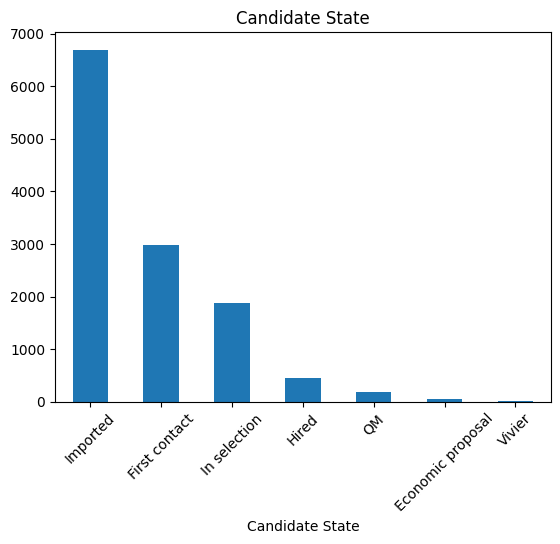

In [13]:
lookup = 'Candidate State'
distrib = Counter(df[lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df = distrib_df.sort_values(by='Count', ascending=False)
distrib_df.plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup)
plt.xticks(rotation=45)

### **Age Range**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '< 20 years'),
  Text(1, 0, '20 - 25 years'),
  Text(2, 0, '26 - 30 years'),
  Text(3, 0, '31 - 35 years'),
  Text(4, 0, '36 - 40 years'),
  Text(5, 0, '40 - 45 years'),
  Text(6, 0, '> 45 years')])

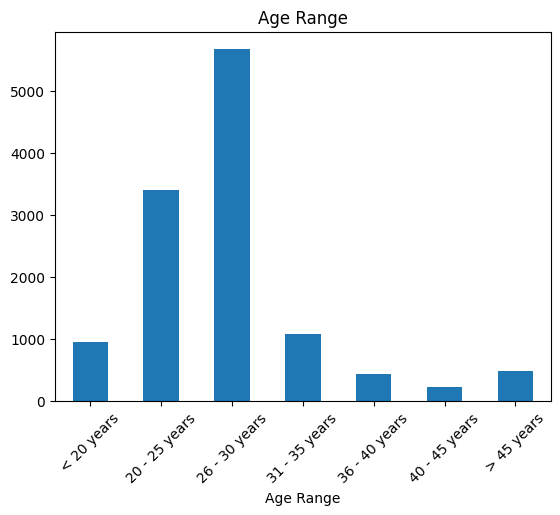

In [14]:
lookup = 'Age Range'
custom_order = ['< 20 years', '20 - 25 years', '26 - 30 years', '31 - 35 years', '36 - 40 years', '40 - 45 years', '> 45 years']
df[lookup] = pd.Categorical(df[lookup], categories=custom_order, ordered=True).sort_values()

distrib = Counter(df[lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df.plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup)
plt.xticks(rotation=45)

### **Residence**

In [15]:
print(df['Residence'].unique())

['TURIN » Turin ~ Piedmont' 'CONVERSANO » Bari ~ Puglia'
 'CASERTA » Caserta ~ Campania' ...
 'SAN FELICE A CANCELLO » Caserta ~ Campania'
 'PERDIFUMO » Salerno ~ Campania'
 'PALMANOVA » Udine ~ Friuli Venezia Giulia']


In [16]:
drop_keywords = [
    'ETHIOPIA',
    'SOUTH AFRICAN REPUBLIC',
    'USSR',
    'YUGOSLAVIA'
]

for kw in drop_keywords:
  mask = df['Residence'].str.contains(kw, na=False)
  df.loc[mask, 'Residence'] = f"{kw} » (STATE) ~ (FOREIGN)"
  print(f"Formatted '{kw}' as '{kw} » (STATE) ~ (FOREIGN)'")

Formatted 'ETHIOPIA' as 'ETHIOPIA » (STATE) ~ (FOREIGN)'
Formatted 'SOUTH AFRICAN REPUBLIC' as 'SOUTH AFRICAN REPUBLIC » (STATE) ~ (FOREIGN)'
Formatted 'USSR' as 'USSR » (STATE) ~ (FOREIGN)'
Formatted 'YUGOSLAVIA' as 'YUGOSLAVIA » (STATE) ~ (FOREIGN)'


In [17]:
residence_list = df['Residence'].unique()
state_list = [s for s in residence_list 
              if ('(STATE)' in s) 
              or ('(COUNTRY)' in s)
              and not ('Not Specified' in s)
              ]
italy_list = [s for s in residence_list 
              if not ('(STATE)' in s) 
              and not ('(COUNTRY)' in s)
              and not ('Not Specified' in s)
]
state_list = sorted({s.split(' » ')[0] for s in state_list if ' » ' in s})
city_list = sorted({s.split(' » ')[0] for s in italy_list if ' » ' in s})
province_list = sorted({s.split(' » ')[1].split(' ~ ')[0] for s in italy_list if ' » ' in s and ' ~ ' in s})
region_list = sorted({s.split(' ~ ')[-1] for s in italy_list if ' ~ ' in s})

print(f"List of residence italian citys of the candidates in the dataset:\n {city_list}")
print(f"List of residence italian provinces of the candidates in the dataset:\n {province_list}")
print(f"List of residence italian regions of the candidates in the dataset:\n {region_list}")
print(f"List of residence states of the candidates in the dataset:\n {state_list}")

def map_residence_city(value):
    for city in city_list:
        if city in value:
            return city
    return 'Not Specified'

def map_residence_province(value):
    for prov in province_list:
        if prov in value:
            return prov
    return 'Not Specified'

def map_residence_region(value):
    for region in region_list:
        if region in value:
            return region
    return 'Not Specified'

def map_residence_state(value):
    for state in state_list:
        if state in value:
            return state
    return 'ITALY'

# Applicazione sulle colonne
df['Residence City']     = df['Residence'].apply(map_residence_city)
df['Residence Province'] = df['Residence'].apply(map_residence_province)
df['Residence Region']   = df['Residence'].apply(map_residence_region)
df['Residence State']    = df['Residence'].apply(map_residence_state)
df.head()


List of residence italian citys of the candidates in the dataset:
 ['ABANO TERME', 'ABBADIA LARIANA', 'ABBADIA SAN SALVATORE', 'ABBASANTA', 'ABBIATEGRASSO', 'ABRIOLA', 'ACATE', 'ACCADIA', 'ACCEPTANCE', 'ACCIANO', 'ACERRA', 'ACI CATENA', "ACI SANT'ANTONIO", 'ACIREALE', 'ACQUAPENDENTE', 'ACQUAVIVA DELLE FONTI', 'ACQUAVIVA PICENA', 'ACQUI TERME', 'ACRE', 'ADDA REVOLT', 'ADELFIA', 'ADRANO', 'ADRIATIC DAWN', 'ADRO', 'AFFI', 'AFFILE', 'AFFORI', 'AFRAGOLA', 'AGAZZANO', 'AGGIUS', 'AGIRA', 'AGLIANO TERME', 'AGLIATE', 'AGNA', 'AGRATE BRIANZA', 'AGRATE CONTURBIA', 'AGRIGENTO', 'AGROPOLIS', 'AIDOMAGGIORE', 'AIDONE', 'AIELLI', 'AIRASCA', 'AIROLA', 'AIRUNO', 'ALAGNA', 'ALASSIO', 'ALATRI', 'ALBA', 'ALBAIRATE', 'ALBANESE SPEZZANO', 'ALBANO LAZIALE', 'ALBANO VERCELLESE', 'ALBENGA', 'ALBERA LIGURE', 'ALBEROBELLO', "ALBIANO D'IVREA", 'ALBIATE', 'ALBINEA', 'ALBINO', 'ALBIOLO', 'ALBISOLA SUPERIORE', 'ALBISSOLA MARINA', 'ALBOGNO', 'ALBUSCIAGO', 'ALCAMO', 'ALESSANDRIA', 'ALESSANDRIA DELLA ROCCA', 'ALESSANO',

,Candidate State,Age Range,Residence,Sex,Study Area,Study Title,Years Experience,Event_Type__Val,Residence City,Residence Province,Residence Region,Residence State
5,Hired,< 20 years,TURIN » Turin ~ Piedmont,Male,Automation/Mechatronics Engineering,Five-year degree,[1-3],BM interview,TURIN,Turin,Piedmont,ITALY
11,Vivier,< 20 years,CONVERSANO » Bari ~ Puglia,Female,computer engineering,Five-year degree,[7-10],Candidate notification,CONVERSANO,Bari,Puglia,ITALY
13,QM,< 20 years,CASERTA » Caserta ~ Campania,Male,chemical engineering,Five-year degree,[3-5],Qualification Meeting,CASERTA,Caserta,Campania,ITALY
17,QM,< 20 years,SESTO SAN GIOVANNI » Milan ~ Lombardy,Male,Legal,Five-year degree,[7-10],Qualification Meeting,SESTO SAN GIOVANNI,Milan,Lombardy,ITALY
25,In selection,< 20 years,MAZARA DEL VALLO » Trapani ~ Sicily,Male,Mechanical engineering,Five-year degree,[3-5],BM interview,ARA,Trapani,Sicily,ITALY


In [18]:
european_countries = [
    'ALBANIA', 'AUSTRIA', 'BELARUS', 'BELGIUM', 'BULGARIA', 'CROATIA', 'CZECH REPUBLIC',
    'FRANCE', 'GERMANY', 'GREAT BRITAIN-NORTHERN IRELAND', 'GREECE', 'ITALY', 'LATVIA',
    'LITHUANIA', 'LUXEMBOURG', 'MALTA', 'MOLDOVA', 'MONACO', 'MONTENEGRO', 'NETHERLANDS',
    'NORWAY', 'POLAND', 'PORTUGAL', 'ROMANIA', 'RUSSIA', 'SAN MARINO', 'SERBIA', 'SLOVAKIA',
    'SLOVENIA', 'SPAIN', 'SWEDEN', 'SWITZERLAND', 'UKRAINE'
]
df['European Residence'] = df['Residence State'].apply(lambda x: 'Yes' if x in european_countries else 'No')
df['Italian Residence'] = df['Residence State'].apply(lambda x: 'Yes' if 'ITALY' in x else 'No')
df.head()

,Candidate State,Age Range,Residence,Sex,Study Area,Study Title,Years Experience,Event_Type__Val,Residence City,Residence Province,Residence Region,Residence State,European Residence,Italian Residence
5,Hired,< 20 years,TURIN » Turin ~ Piedmont,Male,Automation/Mechatronics Engineering,Five-year degree,[1-3],BM interview,TURIN,Turin,Piedmont,ITALY,Yes,Yes
11,Vivier,< 20 years,CONVERSANO » Bari ~ Puglia,Female,computer engineering,Five-year degree,[7-10],Candidate notification,CONVERSANO,Bari,Puglia,ITALY,Yes,Yes
13,QM,< 20 years,CASERTA » Caserta ~ Campania,Male,chemical engineering,Five-year degree,[3-5],Qualification Meeting,CASERTA,Caserta,Campania,ITALY,Yes,Yes
17,QM,< 20 years,SESTO SAN GIOVANNI » Milan ~ Lombardy,Male,Legal,Five-year degree,[7-10],Qualification Meeting,SESTO SAN GIOVANNI,Milan,Lombardy,ITALY,Yes,Yes
25,In selection,< 20 years,MAZARA DEL VALLO » Trapani ~ Sicily,Male,Mechanical engineering,Five-year degree,[3-5],BM interview,ARA,Trapani,Sicily,ITALY,Yes,Yes


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'OMAN'),
  Text(1, 0, 'FRANCE'),
  Text(2, 0, 'INDIA'),
  Text(3, 0, 'GREAT BRITAIN-NORTHERN IRELAND'),
  Text(4, 0, 'GERMANY'),
  Text(5, 0, 'SPAIN'),
  Text(6, 0, 'IRAN'),
  Text(7, 0, "CHINA PEOPLE'S REPUBLIC"),
  Text(8, 0, 'REPUBLIC OF POLAND'),
  Text(9, 0, 'COLOMBIA'),
  Text(10, 0, 'CROATIA'),
  Text(11, 0, 'Türkiye'),
  Text(12, 0, 'TUNISIA'),
  Text(13, 0, 'EGYPT'),
  Text(14, 0, 'BELARUS'),
  Text(15, 0, 'MOROCCO'),
  Text(16, 0, 'BRAZIL'),
  Text(17, 0, 'UNITED STATES OF AMERICA'),
  Text(18, 0, 'AUSTRIA'),
  Text(19, 0, 'SINGAPORE')])

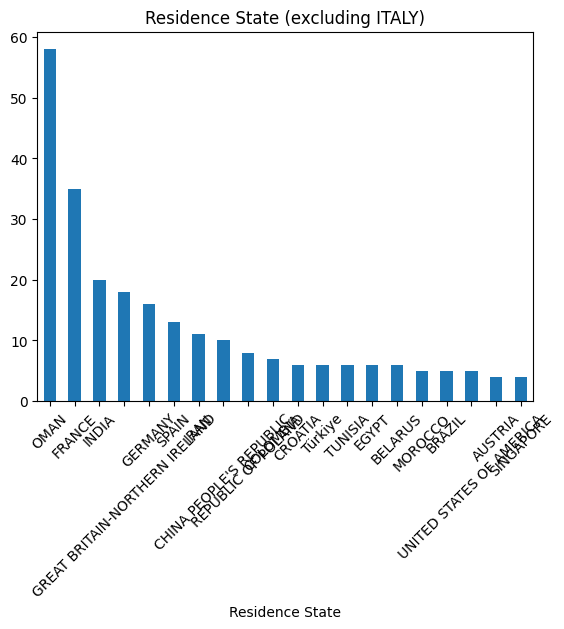

In [19]:
lookup = 'Residence State'
distrib = Counter(df[df[lookup] != 'ITALY'][lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df = distrib_df.sort_values(by='Count', ascending=False)
distrib_df.head(20).plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup + ' (excluding ITALY)')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Piedmont'),
  Text(1, 0, 'Puglia'),
  Text(2, 0, 'Lombardy'),
  Text(3, 0, 'Sicily'),
  Text(4, 0, 'Lazio'),
  Text(5, 0, 'Campania'),
  Text(6, 0, 'Emilia Romagna'),
  Text(7, 0, 'Tuscany'),
  Text(8, 0, 'Not Specified'),
  Text(9, 0, 'Liguria'),
  Text(10, 0, 'Basilicata'),
  Text(11, 0, 'Abruzzo'),
  Text(12, 0, 'Veneto'),
  Text(13, 0, 'Calabria'),
  Text(14, 0, 'Marche'),
  Text(15, 0, 'Sardinia'),
  Text(16, 0, 'Friuli Venezia Giulia'),
  Text(17, 0, 'Molise'),
  Text(18, 0, 'Umbria'),
  Text(19, 0, 'Trentino Alto Adige'),
  Text(20, 0, 'Aosta Valley')])

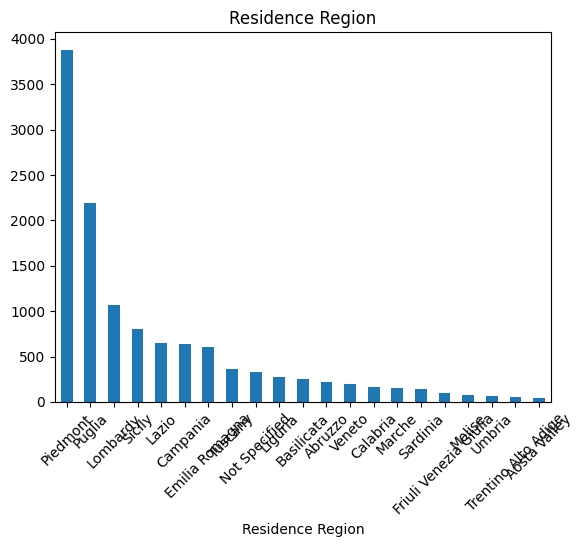

In [20]:
lookup = 'Residence Region'
distrib = Counter(df[lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df = distrib_df.sort_values(by='Count', ascending=False)
distrib_df.plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

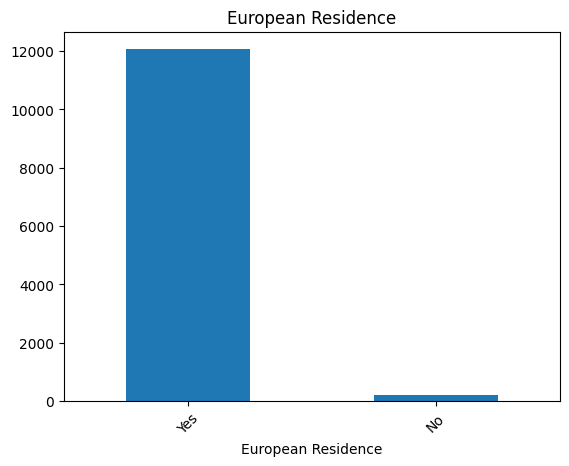

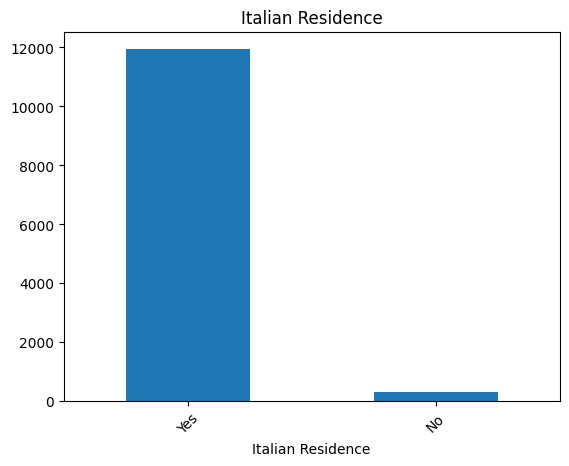

In [21]:
lookup = 'European Residence'
distrib = Counter(df[lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df = distrib_df.sort_values(by='Count', ascending=False)
distrib_df.plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup)
plt.xticks(rotation=45)

lookup = 'Italian Residence'
distrib = Counter(df[lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df = distrib_df.sort_values(by='Count', ascending=False)
distrib_df.plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup)
plt.xticks(rotation=45)

In [22]:
df = df.drop(columns=['Residence'])
df.head()

,Candidate State,Age Range,Sex,Study Area,Study Title,Years Experience,Event_Type__Val,Residence City,Residence Province,Residence Region,Residence State,European Residence,Italian Residence
5,Hired,< 20 years,Male,Automation/Mechatronics Engineering,Five-year degree,[1-3],BM interview,TURIN,Turin,Piedmont,ITALY,Yes,Yes
11,Vivier,< 20 years,Female,computer engineering,Five-year degree,[7-10],Candidate notification,CONVERSANO,Bari,Puglia,ITALY,Yes,Yes
13,QM,< 20 years,Male,chemical engineering,Five-year degree,[3-5],Qualification Meeting,CASERTA,Caserta,Campania,ITALY,Yes,Yes
17,QM,< 20 years,Male,Legal,Five-year degree,[7-10],Qualification Meeting,SESTO SAN GIOVANNI,Milan,Lombardy,ITALY,Yes,Yes
25,In selection,< 20 years,Male,Mechanical engineering,Five-year degree,[3-5],BM interview,ARA,Trapani,Sicily,ITALY,Yes,Yes


### **Sex**

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

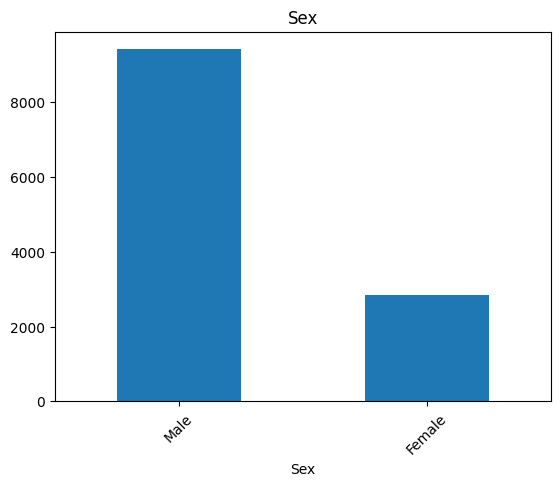

In [23]:
lookup = 'Sex'
distrib = Counter(df[lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df = distrib_df.sort_values(by='Count', ascending=False)
distrib_df.plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup)
plt.xticks(rotation=45)

### **Study Area**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Mechanical engineering'),
  Text(1, 0, 'computer engineering'),
  Text(2, 0, 'Aeronautical/Aerospace/Astronautics Engineering'),
  Text(3, 0, 'Biomedical Engineering'),
  Text(4, 0, 'industrial engineering'),
  Text(5, 0, 'Management Engineering'),
  Text(6, 0, 'electronic Engineering'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Information Engineering'),
  Text(9, 0, 'Automation/Mechatronics Engineering'),
  Text(10, 0, 'Energy and Nuclear Engineering'),
  Text(11, 0, 'Informatics'),
  Text(12, 0, 'Electrical Engineering'),
  Text(13, 0, 'Other scientific subjects'),
  Text(14, 0, 'chemical engineering'),
  Text(15, 0, 'Automotive Engineering'),
  Text(16, 0, 'Telecommunications Engineering'),
  Text(17, 0, 'Civil/Civil and Environmental Engineering'),
  Text(18

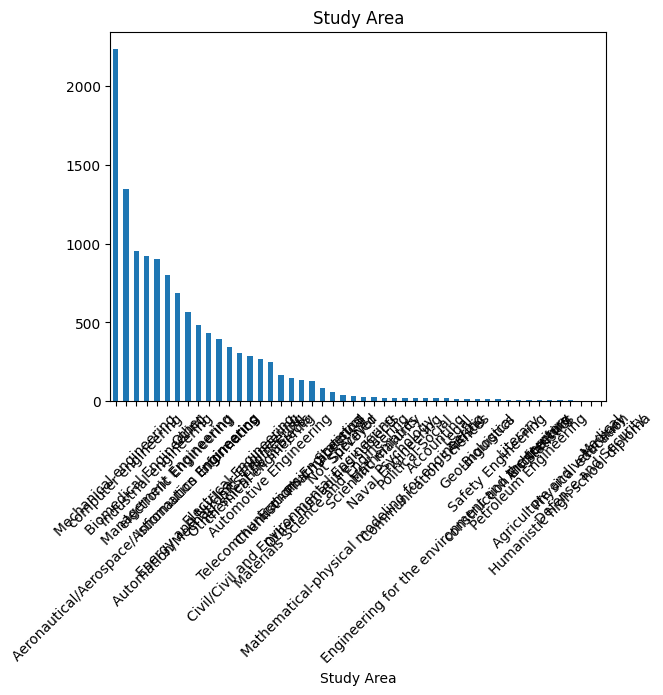

In [24]:
lookup = 'Study Area'
distrib = Counter(df[lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df = distrib_df.sort_values(by='Count', ascending=False)
distrib_df.plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup)
plt.xticks(rotation=45)

### **Study Title**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Five-year degree'),
  Text(1, 0, 'Three-year degree'),
  Text(2, 0, 'High school graduation'),
  Text(3, 0, "master's degree"),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Professional qualification'),
  Text(6, 0, 'Middle school diploma')])

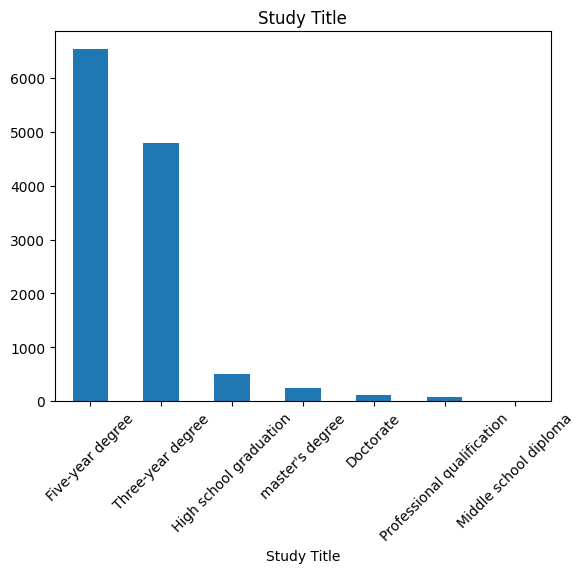

In [25]:
lookup = 'Study Title'
distrib = Counter(df[lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df = distrib_df.sort_values(by='Count', ascending=False)
distrib_df.plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup)
plt.xticks(rotation=45)

### **Years Experience**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '[0]'),
  Text(1, 0, '[0-1]'),
  Text(2, 0, '[1-3]'),
  Text(3, 0, '[3-5]'),
  Text(4, 0, '[5-7]'),
  Text(5, 0, '[7-10]'),
  Text(6, 0, '[+10]')])

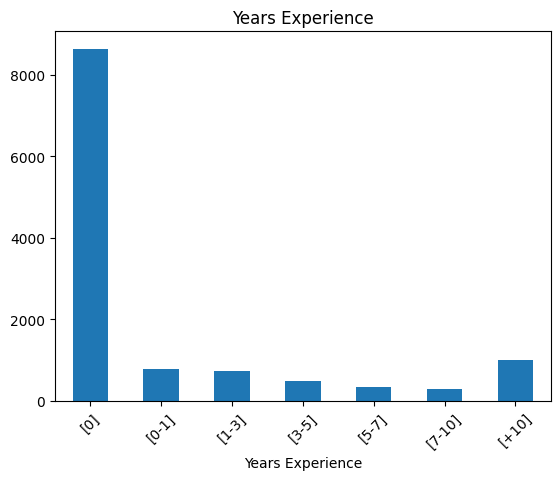

In [26]:
lookup = 'Years Experience'
custom_order = ['[0]', '[0-1]', '[1-3]', '[3-5]', '[5-7]', '[7-10]', '[+10]']
df[lookup] = pd.Categorical(df[lookup], categories=custom_order, ordered=True).sort_values()

distrib = Counter(df[lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df.plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup)
plt.xticks(rotation=45)

### **Event_type__val**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'CV request'),
  Text(1, 0, 'Not Specified'),
  Text(2, 0, 'Contact note'),
  Text(3, 0, 'BM interview'),
  Text(4, 0, 'HR interview'),
  Text(5, 0, 'Candidate notification'),
  Text(6, 0, 'Technical interview'),
  Text(7, 0, 'Sending SC to customer'),
  Text(8, 0, 'Research association'),
  Text(9, 0, 'Qualification Meeting'),
  Text(10, 0, 'Commercial note'),
  Text(11, 0, 'Inadequate CV'),
  Text(12, 0, 'Economic proposal')])

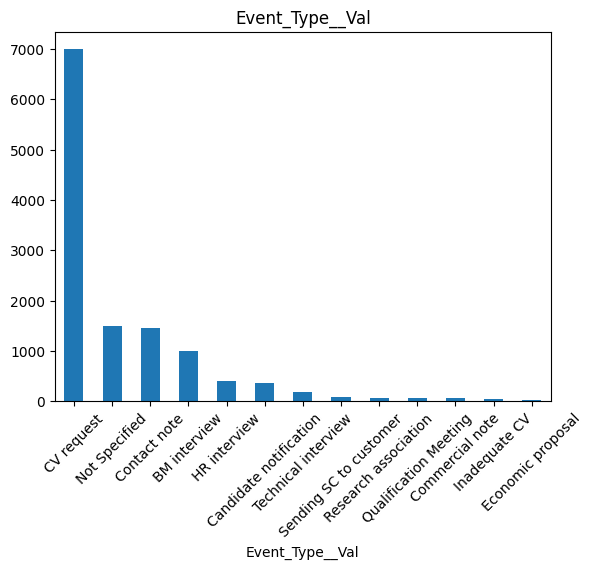

In [27]:
lookup = 'Event_Type__Val'
distrib = Counter(df[lookup])
distrib_df = pd.DataFrame(distrib.items(), columns=[lookup, 'Count'])
distrib_df = distrib_df.sort_values(by='Count', ascending=False)
distrib_df.plot(x=lookup, y='Count', kind='bar', legend=False)
plt.title(lookup)
plt.xticks(rotation=45)

## Data Visualization

### **Sex and Candidate State**

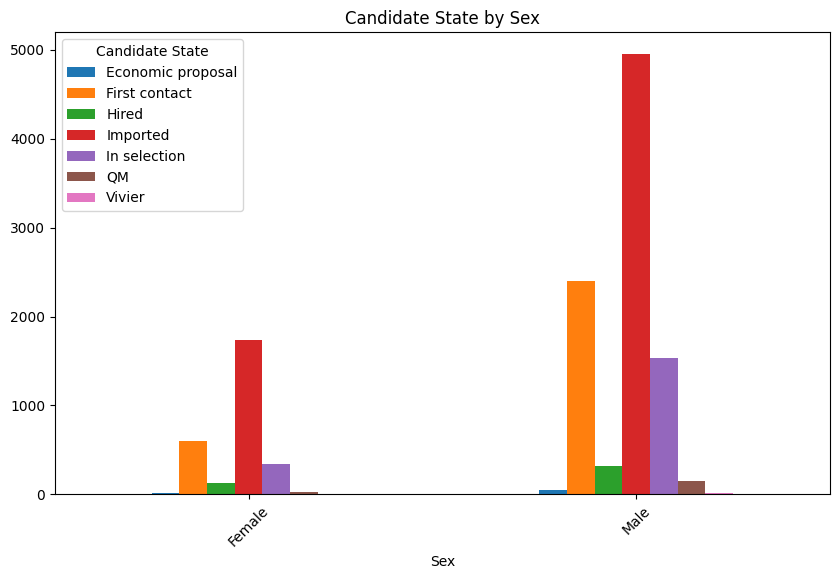

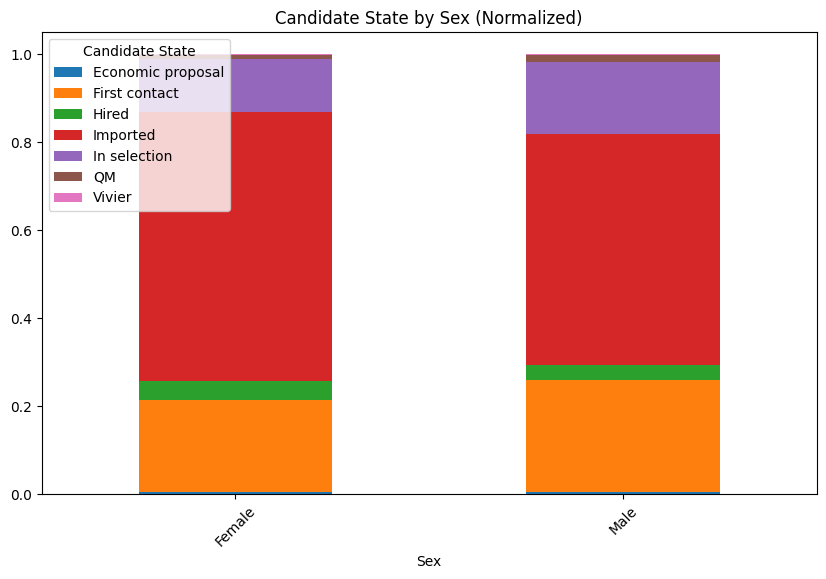

In [28]:
pivot = df.pivot_table(index='Sex', columns='Candidate State', aggfunc='size', fill_value=0)
pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Candidate State by Sex')
plt.xticks(rotation=45)
plt.legend(title='Candidate State', loc='upper left')

pivot = df.pivot_table(index='Sex', columns='Candidate State', aggfunc='size', fill_value=0)
pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0)
pivot_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Candidate State by Sex (Normalized)')
plt.xticks(rotation=45)
plt.legend(title='Candidate State', loc='upper left')

### **Age Range and Candidate State**

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '< 20 years'),
  Text(1, 0, '20 - 25 years'),
  Text(2, 0, '26 - 30 years'),
  Text(3, 0, '31 - 35 years'),
  Text(4, 0, '36 - 40 years'),
  Text(5, 0, '40 - 45 years'),
  Text(6, 0, '> 45 years')])

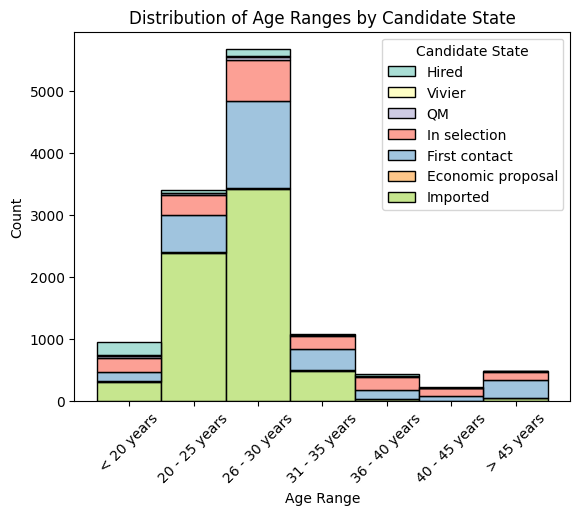

In [29]:
sns.histplot(
    data= df,
    x='Age Range',
    hue='Candidate State',
    multiple='stack',
    palette='Set3',
    legend=True
)
plt.title("Distribution of Age Ranges by Candidate State")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Hired'),
  Text(1, 0, 'Vivier'),
  Text(2, 0, 'QM'),
  Text(3, 0, 'In selection'),
  Text(4, 0, 'First contact'),
  Text(5, 0, 'Economic proposal'),
  Text(6, 0, 'Imported')])

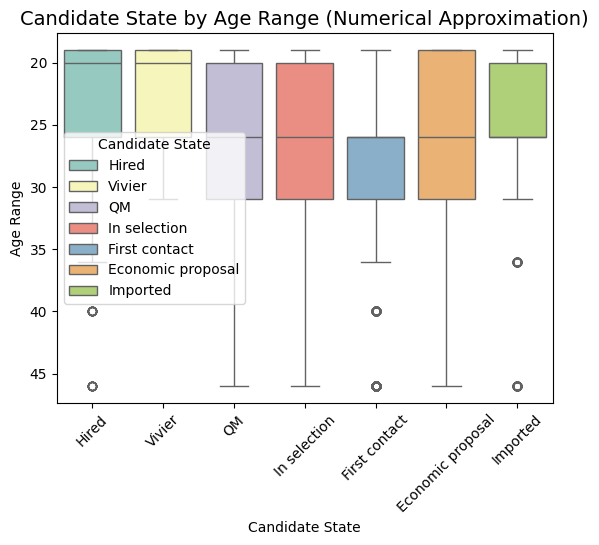

In [30]:
sns.boxplot(
    data=df,
    x='Candidate State',
    y=df['Age Range'].map(lambda x: int(x.split('-')[0]) if '-' in x else (19 if '<' in x else 46)),
    palette='Set3',
    hue='Candidate State',
    legend=True
)
plt.title("Candidate State by Age Range (Numerical Approximation)", fontsize=14)
plt.xticks(rotation=45)


#### **Correlation**

Text(0.5, 1.0, 'Correlation Matrix')

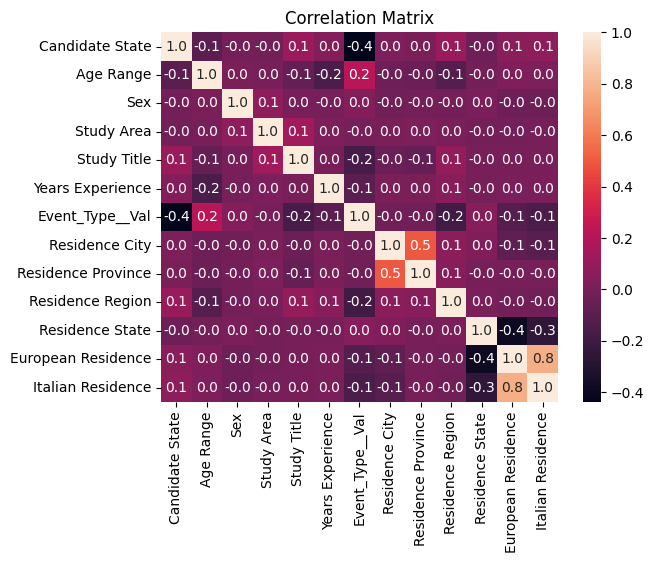

In [38]:
df_encoded = df.copy()

custom_order = ['< 20 years', '20 - 25 years', '26 - 30 years', '31 - 35 years', '36 - 40 years', '40 - 45 years', '> 45 years']

df_encoded['Age Range'] = pd.Categorical(
    df_encoded['Age Range'],
    categories=custom_order,
    ordered=True
).codes + 1

cat_cols = df_encoded.columns.drop('Age Range')

enc = LabelEncoder()
for col in df_encoded.columns.drop('Age Range'):
    if col != 'Age Range':
        df_encoded[col] = enc.fit_transform(df_encoded[col])

correlation_matrix = df_encoded.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
plt.title('Correlation Matrix')